# 데이터 불러오기

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [8]:
df = pd.read_csv("C:\\Users\\seomi\\바탕 화면\\iM Digital academy\\Project\\Analysis of corporate data\\cor_data.csv", encoding='cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347299 entries, 0 to 347298
Data columns (total 45 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   기준년월         347299 non-null  int64  
 1   업종_대분류       347299 non-null  object 
 2   업종_중분류       347299 non-null  object 
 3   사업장_시도       330306 non-null  object 
 4   사업장_시군구      330091 non-null  object 
 5   법인_고객등급      347299 non-null  object 
 6   전담고객여부       347299 non-null  object 
 7   요구불예금잔액      347299 non-null  float64
 8   거치식예금잔액      347299 non-null  float64
 9   적립식예금잔액      347299 non-null  float64
 10  수익증권잔액       347299 non-null  float64
 11  신탁잔액         347299 non-null  float64
 12  퇴직연금잔액       347299 non-null  float64
 13  여신한도금액       347299 non-null  float64
 14  여신_운전자금대출잔액  347299 non-null  float64
 15  여신_시설자금대출잔액  347299 non-null  float64
 16  외환_수출실적금액    347299 non-null  float64
 17  외환_수입실적금액    347299 non-null  float64
 18  신용카드사용금액     347299 non-

In [9]:
df.columns


Index(['기준년월', '업종_대분류', '업종_중분류', '사업장_시도', '사업장_시군구', '법인_고객등급', '전담고객여부',
       '요구불예금잔액', '거치식예금잔액', '적립식예금잔액', '수익증권잔액', '신탁잔액', '퇴직연금잔액', '여신한도금액',
       '여신_운전자금대출잔액', '여신_시설자금대출잔액', '외환_수출실적금액', '외환_수입실적금액', '신용카드사용금액',
       '체크카드사용금액', '창구거래금액', '인터넷뱅킹거래금액', '스마트뱅킹거래금액', '폰뱅킹거래금액', 'ATM거래금액',
       '자동이체금액', '요구불입금금액', '요구불출금금액', '요구불예금좌수', '거치식예금좌수', '적립식예금좌수',
       '수익증권좌수', '신탁좌수', '퇴직연금좌수', '여신_운전자금대출좌수', '여신_시설자금대출좌수', '신용카드개수',
       '외환_수출실적거래건수', '외환_수입실적거래건수', '창구거래건수', '인터넷뱅킹거래건수', '스마트뱅킹거래건수',
       '폰뱅킹거래건수', 'ATM거래건수', '자동이체거래건수'],
      dtype='object')

In [10]:
df.head()

,기준년월,업종_대분류,업종_중분류,사업장_시도,사업장_시군구,법인_고객등급,전담고객여부,요구불예금잔액,거치식예금잔액,적립식예금잔액,...,여신_시설자금대출좌수,신용카드개수,외환_수출실적거래건수,외환_수입실적거래건수,창구거래건수,인터넷뱅킹거래건수,스마트뱅킹거래건수,폰뱅킹거래건수,ATM거래건수,자동이체거래건수
0,202412,건설업,종합 건설업,대구광역시,서구,일반,N,0.16,0.0,0.0,...,0개,10개초과 20개이하,0건,0건,0건,0건,2건초과 5건이하,0건,0건,10건초과 20건이하
1,202412,건설업,종합 건설업,대구광역시,서구,일반,N,0.03,0.0,0.0,...,0개,0개,0건,0건,0건,0건,0건,0건,0건,0건
2,202412,건설업,종합 건설업,대전광역시,서구,우수,N,0.24,0.0,0.0,...,0개,5개초과 10개이하,0건,0건,0건,50건 초과,0건,0건,0건,20건초과 30건이하
3,202412,건설업,종합 건설업,대구광역시,서구,우수,Y,180.00,0.0,0.0,...,0개,0개,0건,0건,2건초과 5건이하,20건초과 30건이하,0건,0건,0건,5건초과 10건이하
4,202412,건설업,종합 건설업,대구광역시,서구,우수,Y,41.00,0.0,0.0,...,0개,5개초과 10개이하,0건,0건,1건,10건초과 20건이하,0건,0건,0건,20건초과 30건이하


# 건수, 좌수 매핑

In [11]:
mapping = {
    "0건": 0,
    "1건": 1,
    "2건": 2,
    "2건초과 5건이하": 3.5,
    "5건초과 10건이하": 7.5,
    "10건초과 20건이하": 15,
    "20건초과 30건이하": 25,
    "30건초과 40건이하": 35,
    "40건초과 50건이하": 45,
    "50건 초과": 55   }

# 각 채널 건수 변환
for col in ["인터넷뱅킹거래건수", "스마트뱅킹거래건수", "폰뱅킹거래건수", "자동이체거래건수", "창구거래건수", "ATM거래건수", "외환_수출실적거래건수","외환_수입실적거래건수"]:
    df[col] = df[col].map(mapping)

In [12]:
mapping = {
    "0개": 0,
    "1개": 1,
    "2개": 2,
    "2개초과 5개이하": 4,
    "5개초과 10개이하": 8,
    "10개초과 20개이하": 15.5,
    "20개초과 30개이하": 25.5,
    "30개초과 40개이하": 35.5,
    "40개초과 50개이하": 45.5,
    "50개 초과": 55  
}

# 변환할 컬럼 목록
cols_to_map = [
    "요구불예금좌수","거치식예금좌수","적립식예금좌수",
    "수익증권좌수","신탁좌수","퇴직연금좌수",
    "여신_운전자금대출좌수","여신_시설자금대출좌수",
    "신용카드개수"]

# 매핑 적용 (원본 컬럼 자체를 덮어쓰기)
for col in cols_to_map:
    df[col] = df[col].map(mapping)

# 간단한 전처리

In [13]:
df['사업장_시도']=df['사업장_시도'].fillna('미정')
df['사업장_시군구']=df['사업장_시군구'].fillna('미정')

In [14]:
df['기준년월']=pd.to_datetime(df['기준년월'],format='%Y%m')
df['기준년월'] = df['기준년월'].dt.to_period('M')

# 파생변수 생성

In [15]:
# ---------------------------------------
# 0) 컬럼 셋업
# ---------------------------------------
deposit_bal_cols = ['요구불예금잔액','거치식예금잔액','적립식예금잔액']
product_bal_cols = ['수익증권잔액','신탁잔액','퇴직연금잔액']
deposit_acct_cols = ['요구불예금좌수','거치식예금좌수','적립식예금좌수']
product_acct_cols = ['수익증권좌수','신탁좌수','퇴직연금좌수']
flow_cols = ['요구불입금금액','요구불출금금액']

# ---------------------------------------
# 1) 파생지표 생성 함수
# ---------------------------------------
def add_features(df):
    out = df.copy()

    # 결측 0 처리(잔액/좌수/흐름)
    for cols in [deposit_bal_cols, product_bal_cols, deposit_acct_cols, product_acct_cols, flow_cols]:
        for c in cols:
            if c in out.columns:
                out[c] = out[c].fillna(0)

    # 총예금/총상품/A총잔액
    out['총예금잔액'] = out[deposit_bal_cols].sum(axis=1, min_count=1)
    out['총상품잔액'] = out[product_bal_cols].sum(axis=1, min_count=1)
    out['총잔액'] = out['총예금잔액'] + out['총상품잔액']

    # 좌수 합 & 계좌당 평균잔액
    out['예금좌수합'] = out[deposit_acct_cols].sum(axis=1, min_count=1)
    out['상품좌수합'] = out[product_acct_cols].sum(axis=1, min_count=1)
    out['예금_계좌당평균잔액'] = np.where(out['예금좌수합']>0, out['총예금잔액']/out['예금좌수합'], np.nan)
    out['상품_계좌당평균잔액'] = np.where(out['상품좌수합']>0, out['총상품잔액']/out['상품좌수합'], np.nan)

    # 보유여부(>0)
    for c in product_bal_cols + deposit_bal_cols:
        if c in out.columns:
            out[c.replace('잔액','보유여부')] = (out[c] > 0).astype(int)

    # 흐름/회전율(간단 버전: 동기간 말잔액 기준)
    out['총거래액'] = out['요구불입금금액'] + out['요구불출금금액']
    out['회전율(간단)'] = np.where(out['총예금잔액']>0, out['총거래액']/out['총예금잔액'], np.nan)

    # 믹스 비중
    out['예금비중'] = np.where(out['총잔액']>0, out['총예금잔액']/out['총잔액'], np.nan)
    out['상품비중'] = np.where(out['총잔액']>0, out['총상품잔액']/out['총잔액'], np.nan)

    return out

df2 = add_features(df)

# 업종별 예금·상품 EDA 

In [16]:
# ---------------------------------------
# 2) 업종별 집계 함수 (대분류/중분류 공용)
#    agg_mode: 'mean' or 'sum' (기본 mean)
# ---------------------------------------
def industry_agg(d, level='대', agg_mode='mean'):
    col = '업종_대분류' if level=='대' else '업종_중분류'
    metrics_mean = [
        '총예금잔액','총상품잔액','총잔액',
        '예금_계좌당평균잔액','상품_계좌당평균잔액',
        '회전율(간단)','예금비중','상품비중'
    ]
    # 보유율(=평균)
    hold_cols = [
        '수익증권보유여부','신탁보유여부','퇴직연금보유여부',
        '요구불예금보유여부','거치식예금보유여부','적립식예금보유여부'
    ]
    metrics_mean = [c for c in metrics_mean if c in d.columns]
    hold_cols = [c for c in hold_cols if c in d.columns]

    if agg_mode == 'sum':
        res1 = d.groupby(col, dropna=False)[['총예금잔액','총상품잔액','총잔액']].sum().rename(columns={
            '총예금잔액':'총예금잔액_sum','총상품잔액':'총상품잔액_sum','총잔액':'총잔액_sum'
        })
        res2 = d.groupby(col, dropna=False)[metrics_mean].mean(numeric_only=True)
        res3 = d.groupby(col, dropna=False)[hold_cols].mean(numeric_only=True)
        res = pd.concat([res1, res2, res3], axis=1).reset_index()
    else:
        res_mean = d.groupby(col, dropna=False)[metrics_mean].mean(numeric_only=True)
        res_hold = d.groupby(col, dropna=False)[hold_cols].mean(numeric_only=True)
        res_sum  = d.groupby(col, dropna=False)[['총예금잔액','총상품잔액','총잔액']].sum().rename(columns={
            '총예금잔액':'총예금잔액_sum','총상품잔액':'총상품잔액_sum','총잔액':'총잔액_sum'
        })
        res = pd.concat([res_mean, res_hold, res_sum], axis=1).reset_index()

    # 보기 좋은 보유율(%) 라벨
    for c in hold_cols:
        res[c] = (res[c]*100).round(1)

    # 정렬 기본: 총잔액 합계 기준
    res = res.sort_values('총잔액_sum', ascending=False)
    return res

ind_big = industry_agg(df2, level='대', agg_mode='mean')
ind_mid = industry_agg(df2, level='중', agg_mode='mean')

##   시각화

### (A) 업종 대분류 Top10: 총잔액 합계 막대 & 예금/상품 구성비 스택

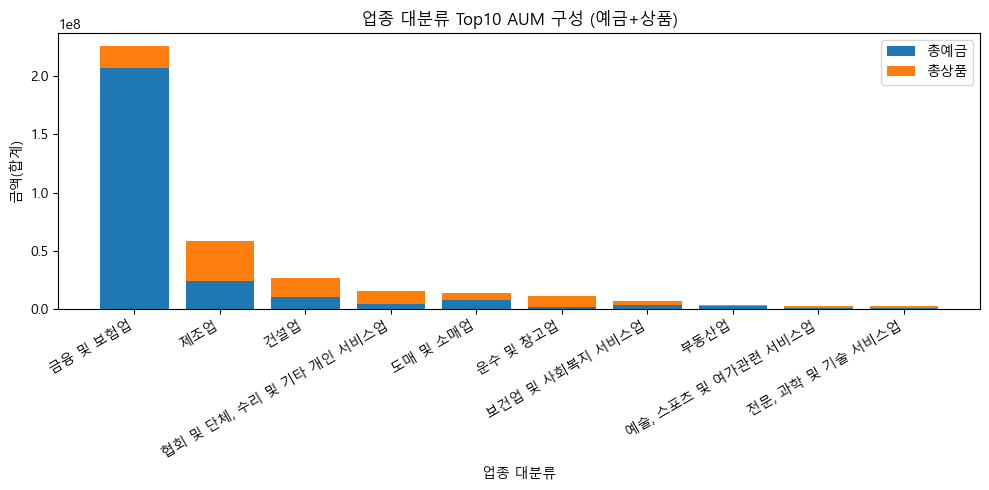

In [17]:
# (A) 업종 대분류 Top10: AUM 합계 막대 & 예금/상품 구성비 스택
topN = 10
plot_df = ind_big.head(topN).copy()

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(plot_df['업종_대분류'], plot_df['총예금잔액_sum'], label='총예금')
ax.bar(plot_df['업종_대분류'], plot_df['총상품잔액_sum'], bottom=plot_df['총예금잔액_sum'], label='총상품')
ax.set_title(f'업종 대분류 Top{topN} AUM 구성 (예금+상품)')
ax.set_xlabel('업종 대분류')
ax.set_ylabel('금액(합계)')
ax.legend()
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

대부분 **“금융 및 보험업”** 이 총잔액 1위로 튀어요. 

결제·청산용 계좌, 자기자금, 수탁·집금 등이 커서 업종 간 비교를 왜곡하기 쉽습니다. 

그다음은 **제조업, 도매·소매업, (프로젝트성 자금이 몰리는) 건설업, 부동산업**이 상위권에 자주 보입니다.

###  (B) 업종 대분류별 평균 회전율(간단) Top10

**회전률(turnover) 은 “얼마나 자주/많이 돈이 돌아갔는가”**

해석 방법

* 값의 단위: “회/기간”(예: 월별 계산이면 ‘월당 몇 회’)

* 크다 → 같은 잔액 대비 돈이 자주 드나든다(결제·운영성 계좌 성격)

* 작다 → 잔액은 있지만 거래는 드물다(유휴자금/보관형 계좌 성격)

* 연환산: 월별 회전률 × 12 (비교 목적일 때만)

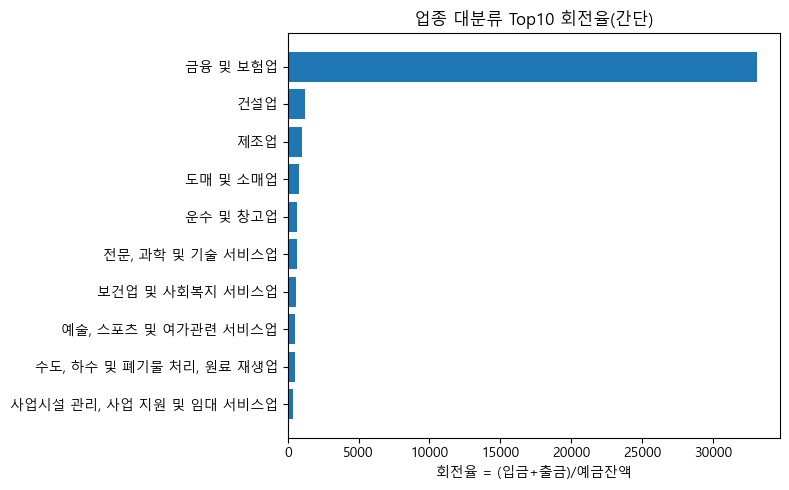

In [18]:
# (B) 업종 대분류별 평균 회전율(간단) Top10
plot_df2 = ind_big[['업종_대분류','회전율(간단)']].dropna().sort_values('회전율(간단)', ascending=False).head(topN)
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(plot_df2['업종_대분류'], plot_df2['회전율(간단)'])
ax.invert_yaxis()
ax.set_title(f'업종 대분류 Top{topN} 회전율(간단)')
ax.set_xlabel('회전율 = (입금+출금)/예금잔액')
plt.tight_layout()
plt.show()

**도매·소매(전자상거래 포함), 음식·숙박(외식), 운수·물류, 무역/유통형 거래업, 금융·보험(결제/청산 계좌)** 에서 회전율이 높은 편인 경우가 많아요.

이들 업종은 소액·다빈도 결제와 짧은 현금/재고 사이클 때문에 (입금+출금)/잔액 비율이 커지기 쉽습니다. 

반대로 **부동산 임대/지주/공공·교육** 같이 자금 보관형 업종은 낮게 나오는 경우가 많고, **건설/프로젝트형**은 월별로 들쑥날쑥(스파이크형)입니다.

### (C) 업종 대분류별 상품 보유율 히트맵(간단 텍스트) – 빠른 비교용

In [19]:
# (C) 업종 대분류별 상품 보유율 히트맵(간단 텍스트) – 빠른 비교용
cols_hold = [c for c in ['수익증권보유여부','신탁보유여부','퇴직연금보유여부'] if c in ind_big.columns]
hm = ind_big[['업종_대분류'] + cols_hold].copy()
print("=== 업종 대분류별 상품 보유율(%) ===")
display(hm.head(topN))  # Jupyter/VSCode Notebook에서 표로 확인

=== 업종 대분류별 상품 보유율(%) ===


,업종_대분류,수익증권보유여부,신탁보유여부,퇴직연금보유여부
3,금융 및 보험업,0.0,20.8,13.7
16,제조업,2.0,31.5,29.1
0,건설업,1.7,19.5,15.6
17,"협회 및 단체, 수리 및 기타 개인 서비스업",1.4,19.8,17.2
5,도매 및 소매업,1.5,18.9,17.0
12,운수 및 창고업,0.9,20.0,18.3
6,보건업 및 사회복지 서비스업,0.2,42.6,42.6
7,부동산업,1.3,7.0,3.0
11,"예술, 스포츠 및 여가관련 서비스업",0.3,16.2,13.7
14,"전문, 과학 및 기술 서비스업",1.4,19.5,18.4


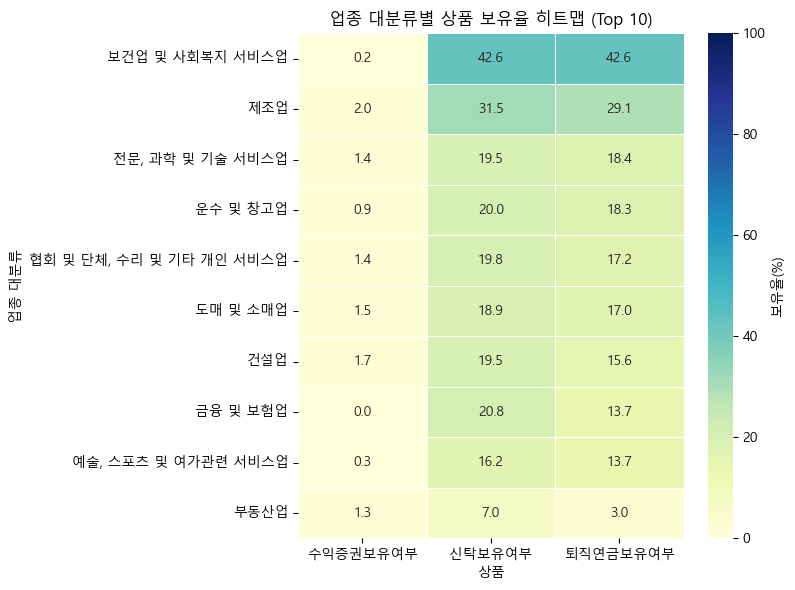

In [20]:
topN = 10  # 상위 N개만 시각화 (AUM 기준 상위에서 가져왔다면 그대로 head 사용)
hm_top = hm.head(topN).copy()

# 혹시 0~1 비율이면 0~100%로 변환
val_cols = [c for c in hm_top.columns if c != '업종_대분류']
if hm_top[val_cols].max(numeric_only=True).max() <= 1.0:
    hm_top[val_cols] = hm_top[val_cols] * 100

# 정렬(옵션): 보유율 평균이 높은 업종부터
hm_top['보유율평균'] = hm_top[val_cols].mean(axis=1, numeric_only=True)
hm_top = hm_top.sort_values('보유율평균', ascending=False).drop(columns='보유율평균')

# 피벗(행=업종, 열=상품)
plot_df = hm_top.set_index('업종_대분류')[val_cols]

# 히트맵
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    plot_df,
    annot=True, fmt=".1f", linewidths=.5,
    cmap="YlGnBu",  # 선호하는 팔레트로 변경 가능
    vmin=0, vmax=100, cbar_kws={'label': '보유율(%)'}
)
ax.set_title(f"업종 대분류별 상품 보유율 히트맵 (Top {topN})")
ax.set_xlabel("상품")
ax.set_ylabel("업종 대분류")
plt.tight_layout()
plt.show()

### (D) 업종 중분류 Top10: 예금/상품 계좌당 평균잔액 비교

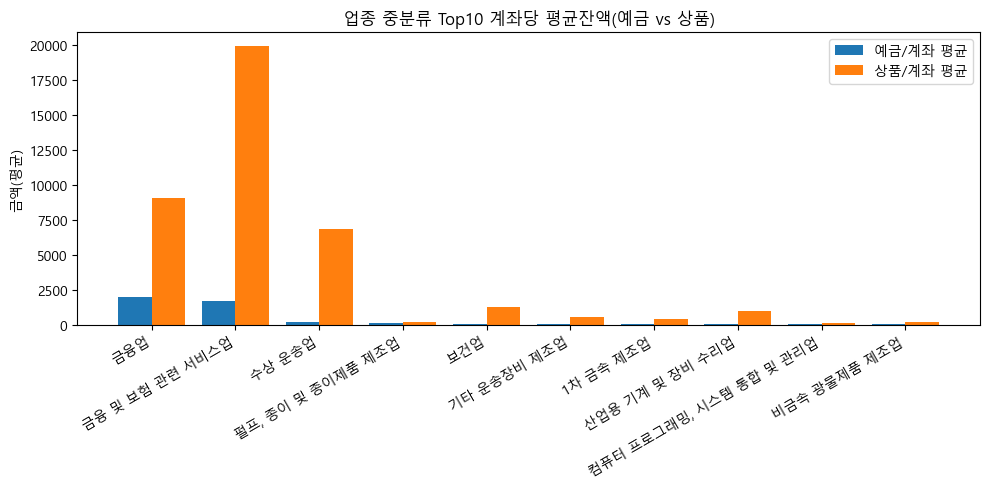

In [21]:
mid_df = ind_mid[['업종_중분류','예금_계좌당평균잔액','상품_계좌당평균잔액']].dropna()
mid_df = mid_df.sort_values('예금_계좌당평균잔액', ascending=False).head(topN)

x = np.arange(len(mid_df))
w = 0.4
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x - w/2, mid_df['예금_계좌당평균잔액'], width=w, label='예금/계좌 평균')
ax.bar(x + w/2, mid_df['상품_계좌당평균잔액'], width=w, label='상품/계좌 평균')
ax.set_xticks(x)
ax.set_xticklabels(mid_df['업종_중분류'], rotation=30, ha='right')
ax.set_title(f'업종 중분류 Top{topN} 계좌당 평균잔액(예금 vs 상품)')
ax.set_ylabel('금액(평균)')
ax.legend()
plt.tight_layout()
plt.show()


# 고객등급별 예금·상품 EDA 

In [22]:
# 2) 고객등급별 집계
def agg_by_grade(d: pd.DataFrame) -> pd.DataFrame:
    gcol = '법인_고객등급'
    if gcol not in d.columns:
        raise KeyError("`법인_고객등급` 컬럼이 필요합니다.")

    # 평균으로 볼 지표(비율/평균/회전율 등)
    mean_cols = [c for c in [
        '예금_계좌당평균잔액','상품_계좌당평균잔액','회전율(간단)','예금비중','상품비중'
    ] if c in d.columns]

    # 보유율(=보유여부의 평균)
    hold_cols = [c for c in [
        '요구불예금보유여부','거치식예금보유여부','적립식예금보유여부',
        '수익증권보유여부','신탁보유여부','퇴직연금보유여부'
    ] if c in d.columns]

    # 합계로 볼 지표(규모)
    sum_cols = [c for c in ['총예금잔액','총상품잔액','총잔액','총거래액'] if c in d.columns]

    res_mean = d.groupby(gcol, dropna=False)[mean_cols].mean(numeric_only=True)
    res_hold = d.groupby(gcol, dropna=False)[hold_cols].mean(numeric_only=True)
    res_sum  = d.groupby(gcol, dropna=False)[sum_cols].sum(numeric_only=True).rename(columns={
        '총예금잔액':'총예금잔액_sum','총상품잔액':'총상품잔액_sum','총잔액':'총잔액_sum','총거래액':'총거래액_sum'
    })

    res = pd.concat([res_mean, res_hold, res_sum], axis=1).reset_index()

    # 보유율 %로 보기 좋게
    for c in hold_cols:
        res[c] = (res[c]*100).round(1)

    # 정렬: AUM 합계 기준
    if '총잔액_sum' in res.columns:
        res = res.sort_values('총잔액_sum', ascending=False)
    return res

In [23]:
print(df['법인_고객등급'].value_counts(dropna=False))

# (선택) 공백/타입 정리 + 등급 순서 지정
df['법인_고객등급'] = df['법인_고객등급'].astype(str).str.strip()
# 예: 등급이 S > A > B > C > D > E 순서라면
order = ['최우수','우수','일반']
df['법인_고객등급'] = pd.Categorical(df['법인_고객등급'], categories=order, ordered=True)


# 2) 고객등급별 집계 -> 이 결과가 'grade'
grade = agg_by_grade(df2)         # 앞서 드린 함수

법인_고객등급
최우수    141317
우수     110923
일반      95059
Name: count, dtype: int64


## 시각화 

### AUM 스택

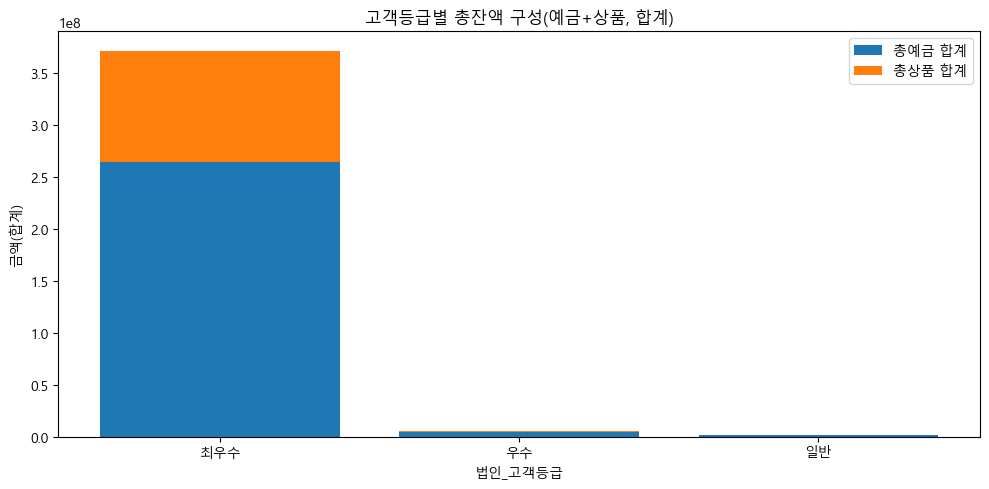

In [24]:
def plot_aum_stack_by_grade(agg_df: pd.DataFrame, topn: int = None):
    dfp = agg_df.copy()
    if topn:
        dfp = dfp.head(topn)
    x = np.arange(len(dfp))
    fig, ax = plt.subplots(figsize=(10,5))
    ax.bar(x, dfp['총예금잔액_sum'], label='총예금 합계')
    ax.bar(x, dfp['총상품잔액_sum'], bottom=dfp['총예금잔액_sum'], label='총상품 합계')
    ax.set_xticks(x)
    ax.set_xticklabels(dfp['법인_고객등급'], rotation=0)
    ax.set_title('고객등급별 총잔액 구성(예금+상품, 합계)')
    ax.set_xlabel('법인_고객등급')
    ax.set_ylabel('금액(합계)')
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_aum_stack_by_grade(grade, topn=None)

###  회전율 막대

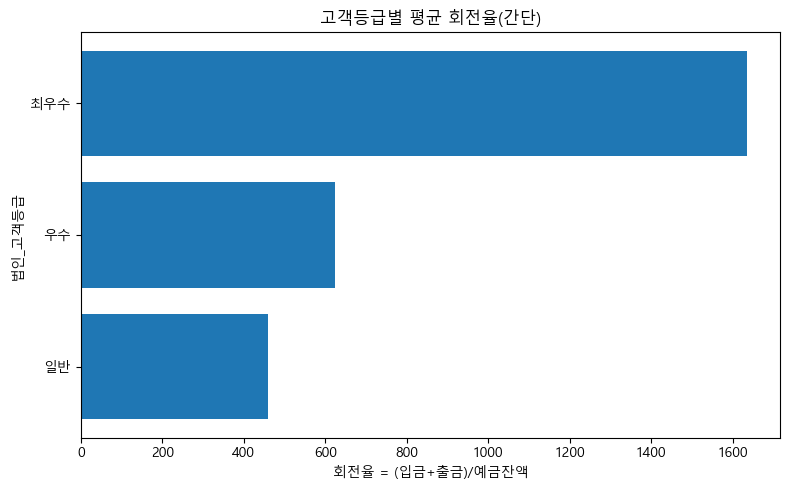

In [25]:
def plot_turnover_by_grade(agg_df: pd.DataFrame, topn: int = None):
    dfp = agg_df[['법인_고객등급','회전율(간단)']].dropna().copy()
    if topn:
        dfp = dfp.nlargest(topn, '회전율(간단)')
    dfp = dfp.sort_values('회전율(간단)', ascending=True)
    fig, ax = plt.subplots(figsize=(8,5))
    ax.barh(dfp['법인_고객등급'], dfp['회전율(간단)'])
    ax.set_title('고객등급별 평균 회전율(간단)')
    ax.set_xlabel('회전율 = (입금+출금)/예금잔액')
    ax.set_ylabel('법인_고객등급')
    plt.tight_layout()
    plt.show()

plot_turnover_by_grade(grade, topn=None)

### 보유율 히트맵

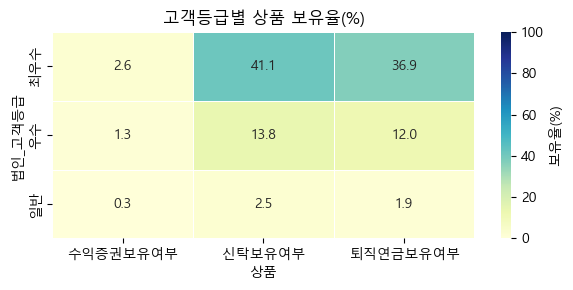

In [26]:

def plot_hold_heatmap_by_grade(agg_df: pd.DataFrame, products=('수익증권','신탁','퇴직연금')):
    # 히트맵용 테이블
    cols = [f'{p}보유여부' for p in products if f'{p}보유여부' in agg_df.columns]
    hm = agg_df[['법인_고객등급'] + cols].set_index('법인_고객등급').copy()
    # 혹시 0~1스케일이면 % 변환
    if hm.max(numeric_only=True).max() <= 1.0:
        hm = hm * 100

    plt.figure(figsize=(6, max(3, len(hm)*0.4)))
    ax = sns.heatmap(hm, annot=True, fmt=".1f", cmap="YlGnBu",
                     vmin=0, vmax=100, cbar_kws={'label': '보유율(%)'},
                     linewidths=.5)
    ax.set_title('고객등급별 상품 보유율(%)')
    ax.set_xlabel('상품')
    ax.set_ylabel('법인_고객등급')
    plt.tight_layout()
    plt.show()

plot_hold_heatmap_by_grade(grade) 

### 고객등급별 계좌당 평균잔액 비교 (예금 vs 상품)

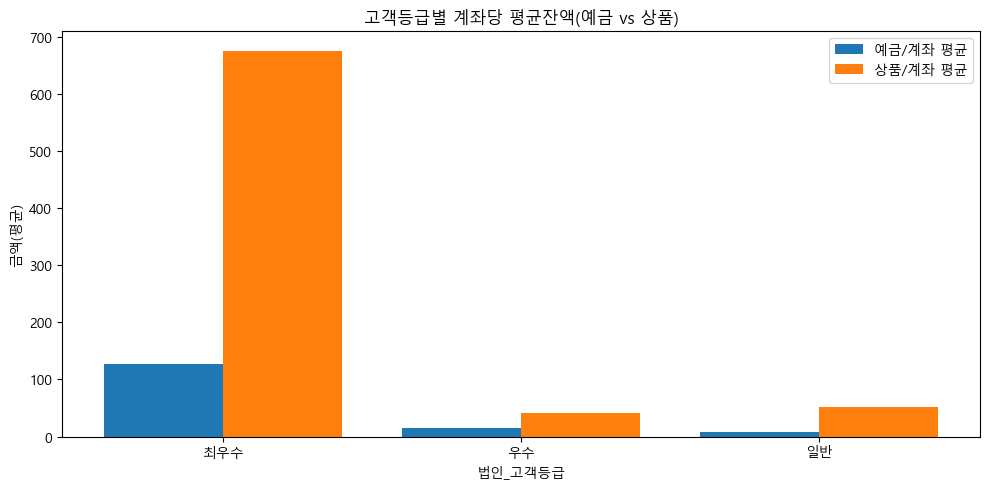

In [27]:
def plot_avg_balance_by_grade(agg_df: pd.DataFrame):
    dfp = agg_df[['법인_고객등급','예금_계좌당평균잔액','상품_계좌당평균잔액']].copy()
    x = np.arange(len(dfp))
    w = 0.4
    fig, ax = plt.subplots(figsize=(10,5))
    ax.bar(x - w/2, dfp['예금_계좌당평균잔액'], width=w, label='예금/계좌 평균')
    ax.bar(x + w/2, dfp['상품_계좌당평균잔액'], width=w, label='상품/계좌 평균')
    ax.set_xticks(x)
    ax.set_xticklabels(dfp['법인_고객등급'])
    ax.set_title('고객등급별 계좌당 평균잔액(예금 vs 상품)')
    ax.set_xlabel('법인_고객등급')
    ax.set_ylabel('금액(평균)')
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_avg_balance_by_grade(grade) 


#  지역별 예금·상품 EDA 

In [28]:
# 2) 지역별 집계: 항상 '지역' 컬럼을 만들고, 그걸로 groupby (시군구도 안전)
def agg_by_region(d: pd.DataFrame, level: str = '시도') -> pd.DataFrame:
    d = d.copy()
    if level == '시도':
        d['지역'] = d['사업장_시도'].astype(str)
    elif level == '시군구':
        d['지역'] = d['사업장_시도'].astype(str) + ' ' + d['사업장_시군구'].astype(str)
    else:
        raise ValueError("level은 '시도' 또는 '시군구' 중 하나여야 합니다.")

    mean_cols = [c for c in [
        '예금_계좌당평균잔액','상품_계좌당평균잔액','회전율(간단)','예금비중','상품비중'
    ] if c in d.columns]

    hold_cols = [c for c in [
        '요구불예금보유여부','거치식예금보유여부','적립식예금보유여부',
        '수익증권보유여부','신탁보유여부','퇴직연금보유여부'
    ] if c in d.columns]

    sum_cols = [c for c in ['총예금잔액','총상품잔액','총잔액','총거래액'] if c in d.columns]

    res_mean = d.groupby(['지역'], dropna=False)[mean_cols].mean(numeric_only=True)
    res_hold = d.groupby(['지역'], dropna=False)[hold_cols].mean(numeric_only=True)
    res_sum  = d.groupby(['지역'], dropna=False)[sum_cols].sum(numeric_only=True).rename(columns={
        '총예금잔액':'총예금잔액_sum',
        '총상품잔액':'총상품잔액_sum',
        '총잔액':'총잔액_sum',            # ← 핵심: 총잔액 합계
        '총거래액':'총거래액_sum'
    })

    res = pd.concat([res_mean, res_hold, res_sum], axis=1).reset_index()

    # 보유율 %로 변환
    for c in hold_cols:
        res[c] = (res[c]*100).round(1)

    # 정렬: 총잔액 합계 기준
    if '총잔액_sum' in res.columns:
        res = res.sort_values('총잔액_sum', ascending=False)

    return res


In [29]:
reg_sido = agg_by_region(df2, level='시도')
reg_sigungu = agg_by_region(df2, level='시군구')

display(reg_sido.head())
display(reg_sigungu.head())


,지역,예금_계좌당평균잔액,상품_계좌당평균잔액,회전율(간단),예금비중,상품비중,요구불예금보유여부,거치식예금보유여부,적립식예금보유여부,수익증권보유여부,신탁보유여부,퇴직연금보유여부,총예금잔액_sum,총상품잔액_sum,총잔액_sum,총거래액_sum
8,서울특별시,483.079115,4402.503467,6842.247974,0.826642,0.173358,66.4,7.0,2.5,0.5,15.1,12.6,1.981973e+08,38701694.54,2.368990e+08,3.790285e+08
4,대구광역시,34.669359,284.893661,682.675679,0.849137,0.150863,91.3,5.3,4.5,1.7,21.3,18.4,3.243363e+07,27431816.92,5.986544e+07,1.706415e+08
2,경상북도,38.131808,374.051564,922.828481,0.818105,0.181895,90.6,5.1,5.1,1.6,24.8,22.6,1.926411e+07,27543257.46,4.680737e+07,1.138374e+08
7,부산광역시,71.700087,695.504172,1081.017691,0.803972,0.196028,87.3,3.8,5.9,0.8,24.1,22.6,1.481750e+07,6561618.41,2.137912e+07,2.317924e+07
0,경기도,48.033009,1689.464745,548.836313,0.910698,0.089302,84.1,2.8,5.0,0.6,10.1,9.2,9.686951e+05,5717913.99,6.686609e+06,7.294653e+06


,지역,예금_계좌당평균잔액,상품_계좌당평균잔액,회전율(간단),예금비중,상품비중,요구불예금보유여부,거치식예금보유여부,적립식예금보유여부,수익증권보유여부,신탁보유여부,퇴직연금보유여부,총예금잔액_sum,총상품잔액_sum,총잔액_sum,총거래액_sum
82,서울특별시 중구,2010.797432,4387.871460,17270.149460,0.705874,0.294126,58.0,12.7,0.2,0.9,25.8,20.7,1.682598e+08,16503056.28,1.847629e+08,6.971742e+07
79,서울특별시 영등포구,922.639327,10047.896257,36581.106323,0.789656,0.210344,63.8,14.4,1.7,0.0,17.2,11.2,1.433991e+07,6182773.40,2.052268e+07,2.282573e+08
60,부산광역시 동구,466.774666,10370.114630,764.466074,0.688043,0.311957,83.2,6.6,4.4,0.0,36.9,36.9,1.261748e+07,4765904.00,1.738338e+07,4.142533e+06
71,서울특별시 강남구,345.507039,1610.437733,1335.793742,0.860698,0.139302,67.0,3.9,3.4,0.8,12.2,10.3,1.217549e+07,4369677.80,1.654517e+07,2.358058e+07
45,대구광역시 달서구,40.484349,411.359347,767.456856,0.829094,0.170906,90.6,4.6,5.8,1.6,23.1,20.5,6.684766e+06,8095201.07,1.477997e+07,3.429513e+07


## 시각화

### 지역별 총잔액 구성(예금+상품, 합계)

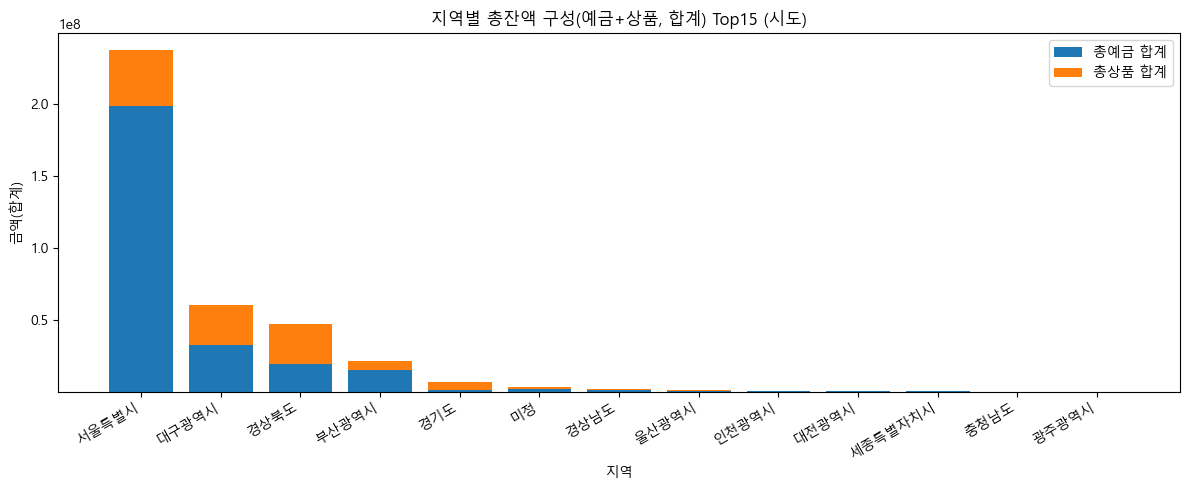

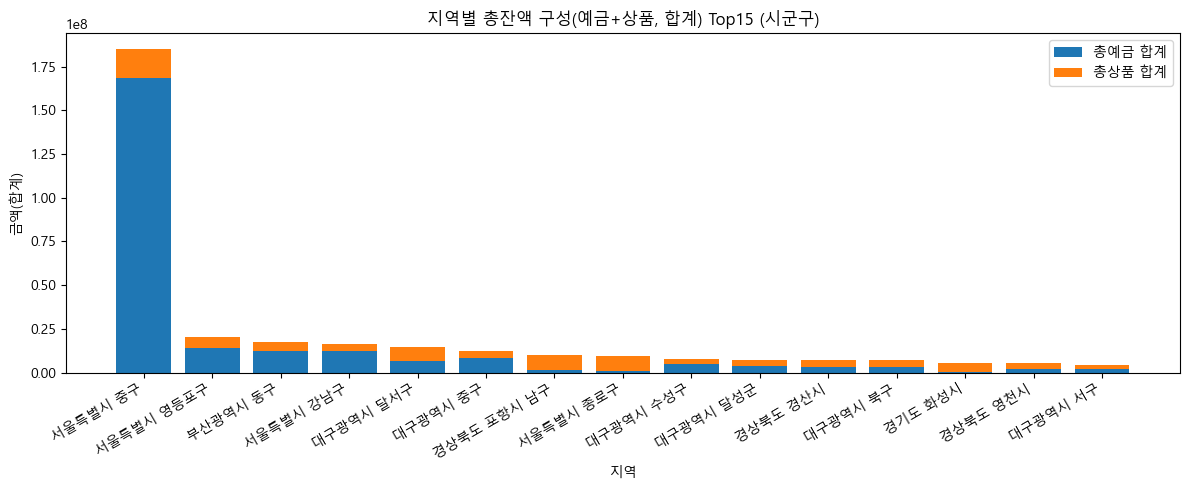

In [30]:
def plot_aum_stack_by_region(agg_df: pd.DataFrame, topn: int = 15, title_suffix=''):
    dfp = agg_df[['지역','총예금잔액_sum','총상품잔액_sum','총잔액_sum']].copy()
    dfp = dfp.sort_values('총잔액_sum', ascending=False).head(topn)
    x = np.arange(len(dfp))
    fig, ax = plt.subplots(figsize=(12,5))
    ax.bar(x, dfp['총예금잔액_sum'], label='총예금 합계')
    ax.bar(x, dfp['총상품잔액_sum'], bottom=dfp['총예금잔액_sum'], label='총상품 합계')
    ax.set_xticks(x)
    ax.set_xticklabels(dfp['지역'], rotation=30, ha='right')
    ax.set_title(f'지역별 총잔액 구성(예금+상품, 합계) Top{topn}{title_suffix}')
    ax.set_xlabel('지역')
    ax.set_ylabel('금액(합계)')
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_aum_stack_by_region(reg_sido, topn=15, title_suffix=' (시도)')
plot_aum_stack_by_region(reg_sigungu, topn=15, title_suffix=' (시군구)')

### 지역별 평균 회전율(간단)

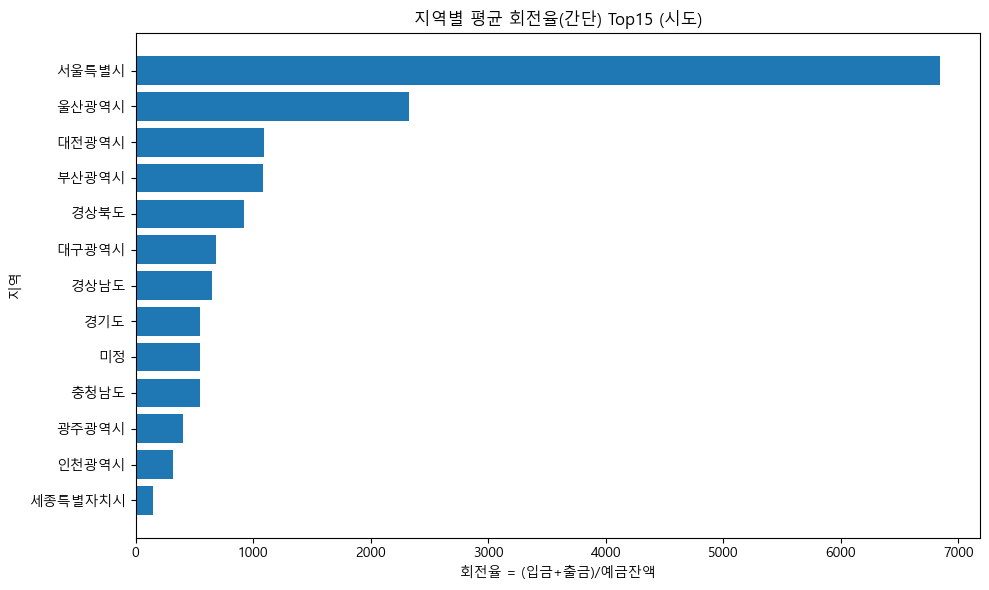

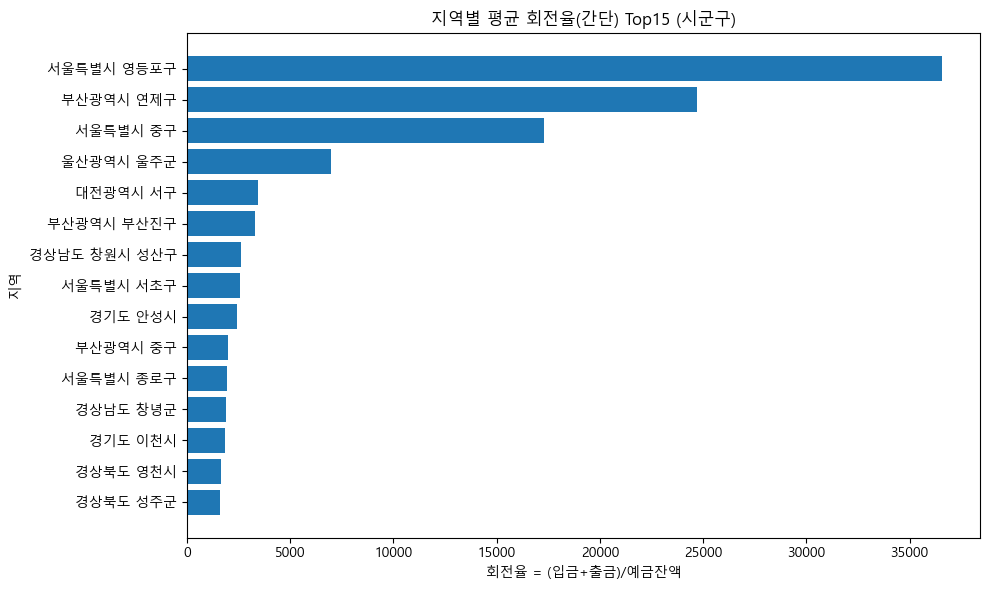

In [31]:
def plot_turnover_by_region(agg_df: pd.DataFrame, topn: int = 15, title_suffix=''):
    dfp = agg_df[['지역','회전율(간단)']].dropna().copy()
    dfp = dfp.sort_values('회전율(간단)', ascending=False).head(topn)
    dfp = dfp.sort_values('회전율(간단)', ascending=True)
    fig, ax = plt.subplots(figsize=(10,6))
    ax.barh(dfp['지역'], dfp['회전율(간단)'])
    ax.set_title(f'지역별 평균 회전율(간단) Top{topn}{title_suffix}')
    ax.set_xlabel('회전율 = (입금+출금)/예금잔액')
    ax.set_ylabel('지역')
    plt.tight_layout()
    plt.show()
    
plot_turnover_by_region(reg_sido, topn=15, title_suffix=' (시도)')
plot_turnover_by_region(reg_sigungu, topn=15, title_suffix=' (시군구)')

### 지역별 상품 보유율(%)

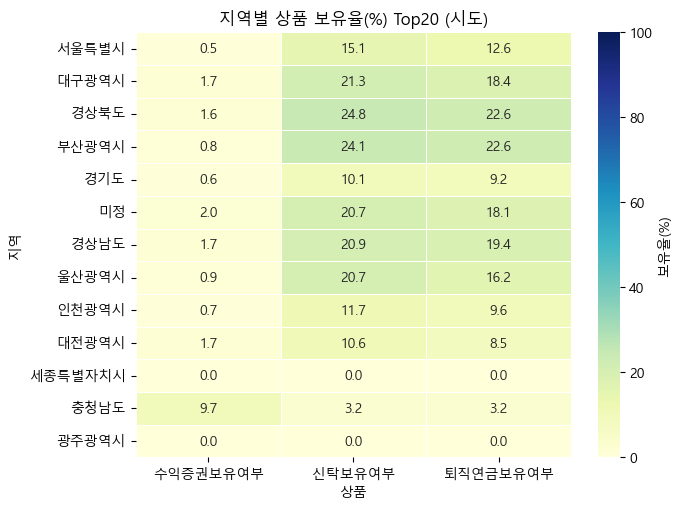

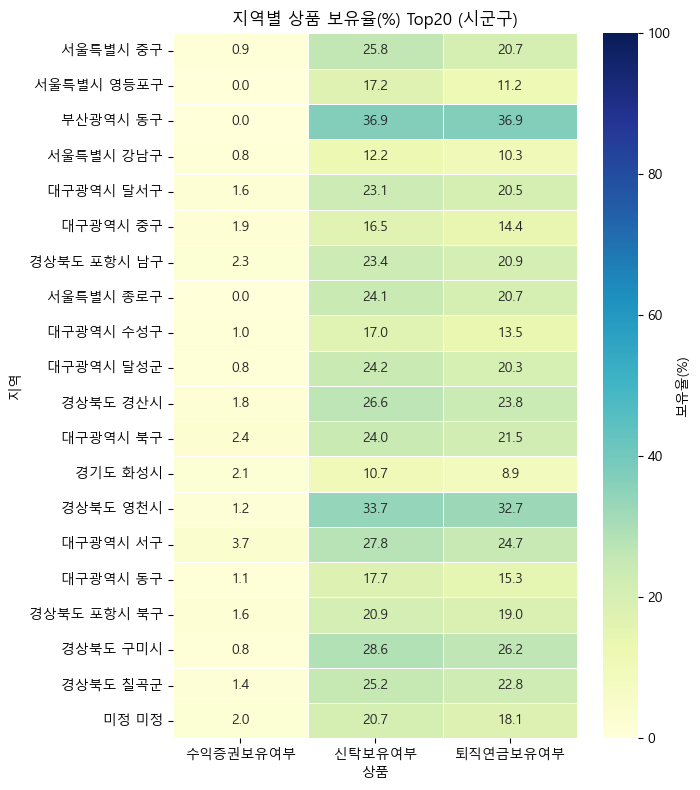

In [32]:
def plot_hold_heatmap_by_region(agg_df: pd.DataFrame,
                                products=('수익증권','신탁','퇴직연금'),
                                topn: int = 20, title_suffix=''):
    cols = [f'{p}보유여부' for p in products if f'{p}보유여부' in agg_df.columns]
    if not cols:
        raise ValueError("보유율 컬럼이 없습니다. (예: '수익증권보유여부','신탁보유여부','퇴직연금보유여부')")

    # 총잔액 합계 기준 상위 지역
    order = (agg_df[['지역','총잔액_sum']]
             .dropna(subset=['총잔액_sum'])
             .sort_values('총잔액_sum', ascending=False)
             .head(topn)['지역']
             .tolist())

    hm = agg_df.loc[agg_df['지역'].isin(order), ['지역'] + cols].copy()
    if hm[cols].max(numeric_only=True).max() <= 1.0:
        hm[cols] = hm[cols] * 100

    hm['지역'] = pd.Categorical(hm['지역'], categories=order, ordered=True)
    hm = hm.sort_values('지역').set_index('지역')

    plt.figure(figsize=(7, max(3, len(hm)*0.4)))
    ax = sns.heatmap(hm, annot=True, fmt=".1f", cmap="YlGnBu", vmin=0, vmax=100,
                     cbar_kws={'label': '보유율(%)'}, linewidths=.5)
    ax.set_title(f'지역별 상품 보유율(%) Top{topn}{title_suffix}')
    ax.set_xlabel('상품')
    ax.set_ylabel('지역')
    plt.tight_layout()
    plt.show()

plot_hold_heatmap_by_region(reg_sido, topn=20, title_suffix=' (시도)')
plot_hold_heatmap_by_region(reg_sigungu, topn=20, title_suffix=' (시군구)')

### 지역별 계좌당 평균잔액(예금 vs 상품)

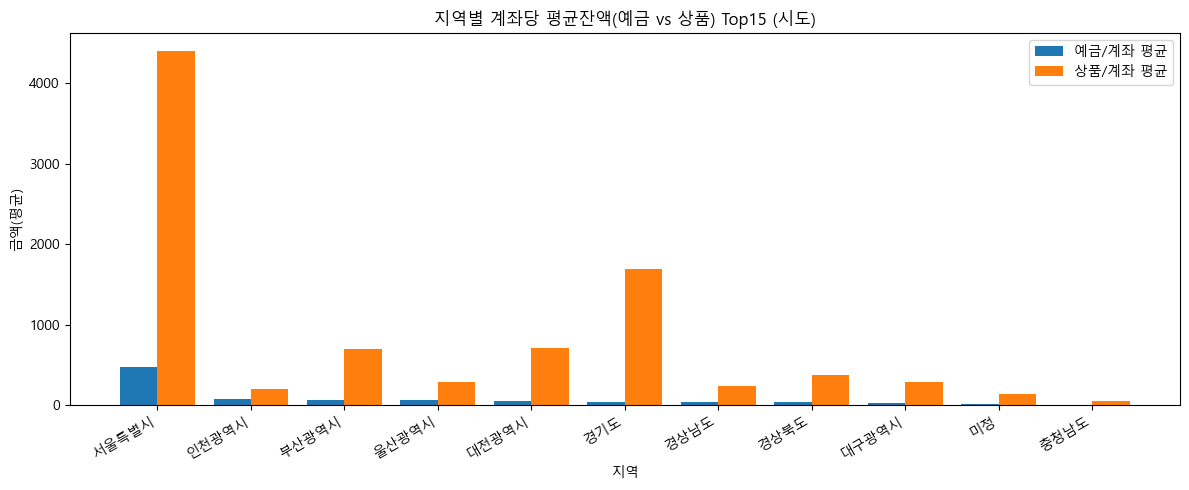

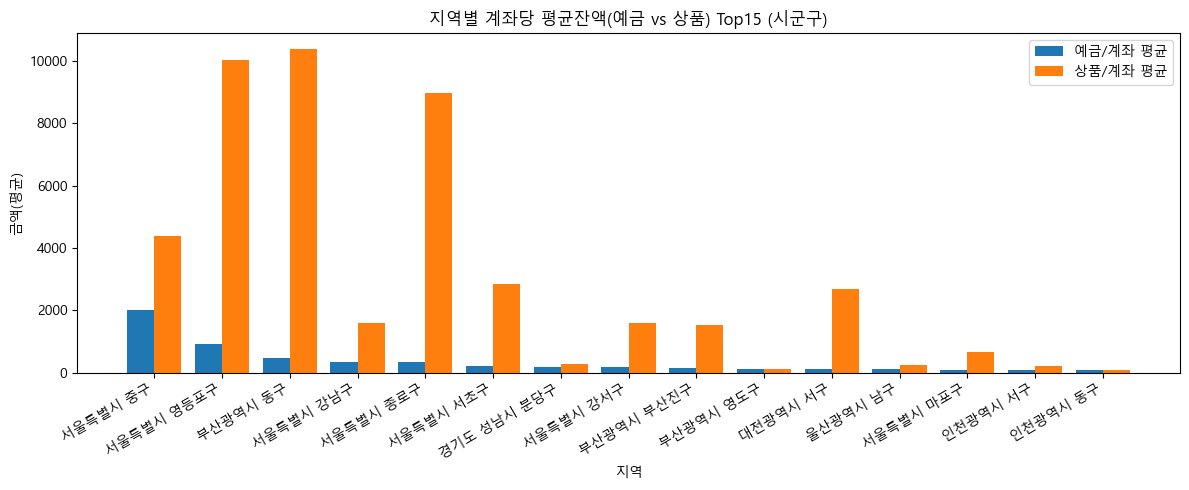

In [33]:
def plot_avg_balance_by_region(agg_df: pd.DataFrame, topn: int = 15, title_suffix=''):
    dfp = agg_df[['지역','예금_계좌당평균잔액','상품_계좌당평균잔액']].dropna().copy()
    dfp = dfp.sort_values('예금_계좌당평균잔액', ascending=False).head(topn)
    x = np.arange(len(dfp))
    w = 0.4
    fig, ax = plt.subplots(figsize=(12,5))
    ax.bar(x - w/2, dfp['예금_계좌당평균잔액'], width=w, label='예금/계좌 평균')
    ax.bar(x + w/2, dfp['상품_계좌당평균잔액'], width=w, label='상품/계좌 평균')
    ax.set_xticks(x)
    ax.set_xticklabels(dfp['지역'], rotation=30, ha='right')
    ax.set_title(f'지역별 계좌당 평균잔액(예금 vs 상품) Top{topn}{title_suffix}')
    ax.set_xlabel('지역')
    ax.set_ylabel('금액(평균)')
    ax.legend()
    plt.tight_layout()
    plt.show()
plot_avg_balance_by_region(reg_sido, topn=15, title_suffix=' (시도)')
plot_avg_balance_by_region(reg_sigungu, topn=15, title_suffix=' (시군구)')


# 전담고객 여부별 예금·상품 EDA 

In [34]:
# 2) 전담고객여부 표준화 (Y/N, 1/0, True/False, 한글 등 혼재 대비)
def normalize_rm_flag(s: pd.Series) -> pd.Series:
    m = s.astype(str).str.strip().str.lower()
    # 전담이 맞다고 판단되는 값들
    yes = {'y','yes','1','true','t','전담','담당','o','양호','ok'}
    no  = {'n','no','0','false','f','비전담','무','x','없음','미'}
    out = np.where(m.isin(yes), '전담',
          np.where(m.isin(no),  '비전담',
                   '미기재'))
    return pd.Series(out, index=s.index)

# 3) 전담여부별 집계
def agg_by_rm(d: pd.DataFrame) -> pd.DataFrame:
    if '전담고객여부' not in d.columns:
        raise KeyError("`전담고객여부` 컬럼이 필요합니다.")
    d = d.copy()
    d['전담여부'] = normalize_rm_flag(d['전담고객여부'])

    mean_cols = [c for c in [
        '예금_계좌당평균잔액','상품_계좌당평균잔액','회전율(간단)','예금비중','상품비중'
    ] if c in d.columns]

    hold_cols = [c for c in [
        '요구불예금보유여부','거치식예금보유여부','적립식예금보유여부',
        '수익증권보유여부','신탁보유여부','퇴직연금보유여부'
    ] if c in d.columns]

    sum_cols = [c for c in ['총예금잔액','총상품잔액','총잔액','총거래액'] if c in d.columns]

    res_mean = d.groupby('전담여부', dropna=False)[mean_cols].mean(numeric_only=True)
    res_hold = d.groupby('전담여부', dropna=False)[hold_cols].mean(numeric_only=True)
    res_sum  = d.groupby('전담여부', dropna=False)[sum_cols].sum(numeric_only=True).rename(columns={
        '총예금잔액':'총예금잔액_sum',
        '총상품잔액':'총상품잔액_sum',
        '총잔액':'총잔액_sum',
        '총거래액':'총거래액_sum'
    })
    res_cnt  = d.groupby('전담여부', dropna=False).size().rename('고객수')

    res = pd.concat([res_mean, res_hold, res_sum, res_cnt], axis=1).reset_index()

    # 보유율 % 변환
    for c in hold_cols:
        res[c] = (res[c]*100).round(1)

    # 정렬: 총잔액 합계 기준
    if '총잔액_sum' in res.columns:
        res = res.sort_values('총잔액_sum', ascending=False)

    # 보기 좋은 순서
    order = ['전담','비전담','미기재']
    res['전담여부'] = pd.Categorical(res['전담여부'], categories=order, ordered=True)
    res = res.sort_values('전담여부')
    res = res.reset_index(drop=True)
    return res

In [35]:
rm = agg_by_rm(df2)
display(rm)  # 집계 테이블 확인

,전담여부,예금_계좌당평균잔액,상품_계좌당평균잔액,회전율(간단),예금비중,상품비중,요구불예금보유여부,거치식예금보유여부,적립식예금보유여부,수익증권보유여부,신탁보유여부,퇴직연금보유여부,총예금잔액_sum,총상품잔액_sum,총잔액_sum,총거래액_sum,고객수
0,전담,62.945340,477.667410,1173.905281,0.801606,0.198394,90.3,6.4,5.7,1.9,27.3,24.3,1.802893e+08,98586520.67,2.788758e+08,5.236409e+08,267587
1,비전담,41.689323,935.534425,410.271845,0.969271,0.030729,84.7,1.2,2.1,0.4,3.4,2.9,8.938704e+07,10309214.78,9.969626e+07,1.929282e+08,79712


## 시각화

### 전담고객여부별 총잔액 구성(예금+상품, 합계)

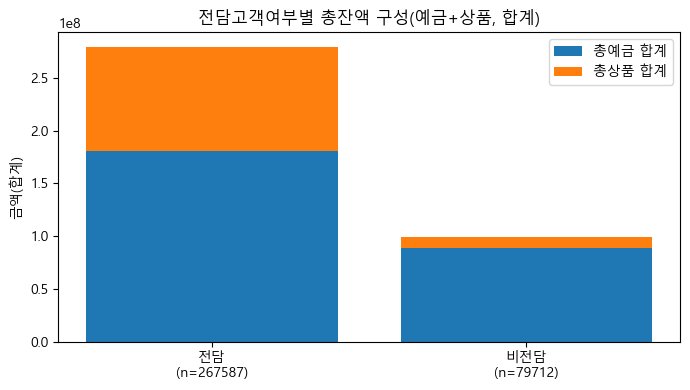

In [36]:
def plot_aum_stack_by_rm(agg_df: pd.DataFrame):
    dfp = agg_df[['전담여부','총예금잔액_sum','총상품잔액_sum','총잔액_sum','고객수']].copy()
    x = np.arange(len(dfp))
    fig, ax = plt.subplots(figsize=(7,4))
    ax.bar(x, dfp['총예금잔액_sum'], label='총예금 합계')
    ax.bar(x, dfp['총상품잔액_sum'], bottom=dfp['총예금잔액_sum'], label='총상품 합계')
    ax.set_xticks(x)
    ax.set_xticklabels([f"{a}\n(n={b})" for a,b in zip(dfp['전담여부'], dfp['고객수'])])
    ax.set_title('전담고객여부별 총잔액 구성(예금+상품, 합계)')
    ax.set_ylabel('금액(합계)')
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_aum_stack_by_rm(rm)

### 전담고객여부별 평균 회전율(간단)

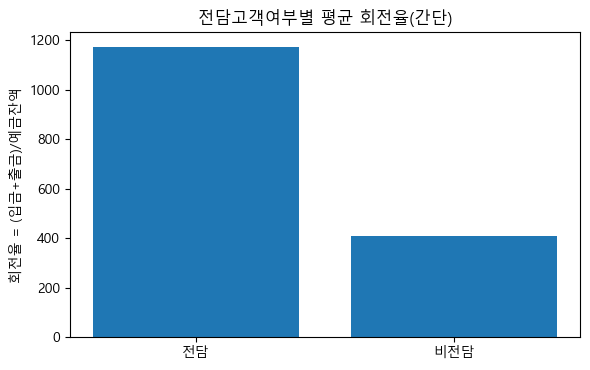

In [37]:
def plot_turnover_by_rm(agg_df: pd.DataFrame):
    dfp = agg_df[['전담여부','회전율(간단)']].dropna().copy()
    fig, ax = plt.subplots(figsize=(6,3.8))
    ax.bar(dfp['전담여부'], dfp['회전율(간단)'])
    ax.set_title('전담고객여부별 평균 회전율(간단)')
    ax.set_ylabel('회전율 = (입금+출금)/예금잔액')
    plt.tight_layout()
    plt.show()

plot_turnover_by_rm(rm)


### 전담고객여부별 상품 보유율(%)

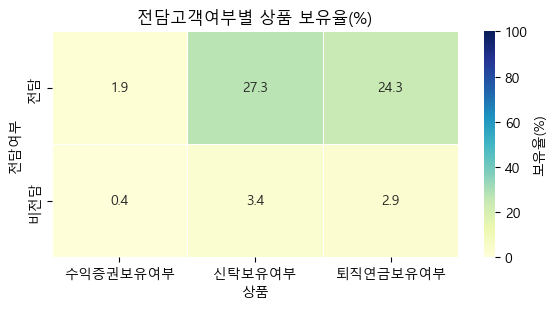

In [38]:
def plot_hold_heatmap_by_rm(agg_df: pd.DataFrame, products=('수익증권','신탁','퇴직연금')):
    cols = [f'{p}보유여부' for p in products if f'{p}보유여부' in agg_df.columns]
    if not cols:
        raise ValueError("보유율 컬럼이 없습니다. (예: '수익증권보유여부','신탁보유여부','퇴직연금보유여부')")
    hm = agg_df[['전담여부'] + cols].copy()
    if hm[cols].max(numeric_only=True).max() <= 1.0:
        hm[cols] = hm[cols] * 100
    hm = hm.set_index('전담여부')
    plt.figure(figsize=(5.8, 2.6 + 0.3*len(hm)))
    ax = sns.heatmap(hm, annot=True, fmt=".1f", cmap="YlGnBu", vmin=0, vmax=100,
                     cbar_kws={'label': '보유율(%)'}, linewidths=.5)
    ax.set_title('전담고객여부별 상품 보유율(%)')
    ax.set_xlabel('상품')
    ax.set_ylabel('전담여부')
    plt.tight_layout()
    plt.show()

plot_hold_heatmap_by_rm(rm)

### 전담고객여부별 계좌당 평균잔액(예금 vs 상품)

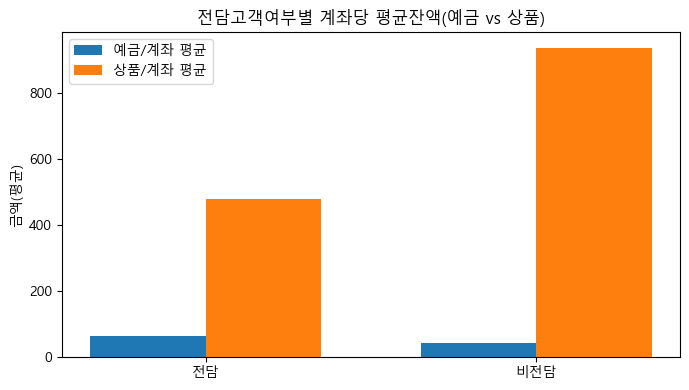

In [39]:
def plot_avg_balance_by_rm(agg_df: pd.DataFrame):
    dfp = agg_df[['전담여부','예금_계좌당평균잔액','상품_계좌당평균잔액']].copy()
    x = np.arange(len(dfp))
    w = 0.35
    fig, ax = plt.subplots(figsize=(7,4))
    ax.bar(x - w/2, dfp['예금_계좌당평균잔액'], width=w, label='예금/계좌 평균')
    ax.bar(x + w/2, dfp['상품_계좌당평균잔액'], width=w, label='상품/계좌 평균')
    ax.set_xticks(x)
    ax.set_xticklabels(dfp['전담여부'])
    ax.set_title('전담고객여부별 계좌당 평균잔액(예금 vs 상품)')
    ax.set_ylabel('금액(평균)')
    ax.legend()
    plt.tight_layout()
    plt.show()
plot_avg_balance_by_rm(rm)

# 년도-월별 예금·상품 EDA

In [40]:

# 0) 합계·기간·활동성 보장
import pandas as pd
def ensure_totals_and_time(df: pd.DataFrame) -> pd.DataFrame:
    x = df.copy()

    # 합계 생성(없으면)
    if '총예금잔액' not in x:
        x['총예금잔액'] = x[[c for c in deposit_bal_cols if c in x]].sum(axis=1, min_count=1)
    if '총상품잔액' not in x:
        x['총상품잔액'] = x[[c for c in product_bal_cols if c in x]].sum(axis=1, min_count=1)
    if '총잔액' not in x:
        x['총잔액'] = x['총예금잔액'] + x['총상품잔액']

    # 기간(연/월/월시작일)
    if '월_시작일' not in x.columns:
        if '기준년월' in x.columns:
            if pd.api.types.is_period_dtype(x['기준년월']):
                x['월_시작일'] = x['기준년월'].dt.to_timestamp()
            else:
                x['월_시작일'] = pd.to_datetime(x['기준년월'], errors='coerce').astype('datetime64[M]')
        else:
            raise KeyError("`기준년월` 또는 `월_시작일`이 필요합니다.")
    if '연' not in x.columns:
        x['연'] = x['월_시작일'].dt.year
    x['월번호'] = x['월_시작일'].dt.month
    if '월' not in x.columns:
        x['월'] = x['월_시작일'].dt.to_period('M').astype(str)   # 'YYYY-MM'

    # 활동성(없으면)
    if '총거래액' not in x.columns:
        x['총거래액'] = x.get('요구불입금금액', 0).fillna(0) + x.get('요구불출금금액', 0).fillna(0)
    if '회전율(간단)' not in x.columns:
        x['회전율(간단)'] = np.where(x['총예금잔액']>0, x['총거래액']/x['총예금잔액'], np.nan)

    # 믹스(없으면)
    if '예금비중' not in x.columns:
        x['예금비중'] = np.where(x['총잔액']>0, x['총예금잔액']/x['총잔액'], np.nan)
    if '상품비중' not in x.columns:
        x['상품비중'] = np.where(x['총잔액']>0, x['총상품잔액']/x['총잔액'], np.nan)
    return x

In [41]:
# 1) 년도-월별 집계
def agg_by_year_month(d: pd.DataFrame) -> pd.DataFrame:
    x = ensure_totals_and_time(d)
    g = x.groupby(['연','월번호','월','월_시작일'], dropna=False)

    res_sum  = g[['총예금잔액','총상품잔액','총잔액','총거래액']].sum(numeric_only=True).rename(columns={
        '총예금잔액':'총예금잔액_sum', '총상품잔액':'총상품잔액_sum',
        '총잔액':'총잔액_sum', '총거래액':'총거래액_sum'
    })
    res_mean = g[['회전율(간단)','예금비중','상품비중']].mean(numeric_only=True)

    out = pd.concat([res_sum, res_mean], axis=1).reset_index()
    out = out.sort_values('월_시작일').reset_index(drop=True)

    # 성장률(옵션): 월간 MoM/YoY
    out = out.sort_values('월_시작일')
    out['MoM_%'] = out['총잔액_sum'].pct_change()*100
    # 같은 '월번호' 기준 12개월 전 비교
    out['YoY_%'] = out['총잔액_sum'].pct_change(12)*100
    return out

In [42]:
ym = agg_by_year_month(df2)
display(ym.head())

,연,월번호,월,월_시작일,총예금잔액_sum,총상품잔액_sum,총잔액_sum,총거래액_sum,회전율(간단),예금비중,상품비중,MoM_%,YoY_%
0,2022,1,2022-01,2022-01-01,7944708.69,2762183.73,10706892.42,22084638.78,657.375323,0.839834,0.160166,NaN,NaN
1,2022,2,2022-02,2022-02-01,7493512.79,2777481.02,10270993.81,16480845.41,926.136805,0.836033,0.163967,-4.071196,NaN
2,2022,3,2022-03,2022-03-01,7122284.33,2677203.56,9799487.89,19016458.00,816.327751,0.833984,0.166016,-4.590655,NaN
3,2022,4,2022-04,2022-04-01,6832761.54,2781174.62,9613936.16,18950105.92,595.211270,0.839301,0.160699,-1.893484,NaN
4,2022,5,2022-05,2022-05-01,6651100.34,2765769.06,9416869.40,19023569.29,998.837669,0.841217,0.158783,-2.049803,NaN


## 시각화

### 월별 총잔액 구성(예금+상품)

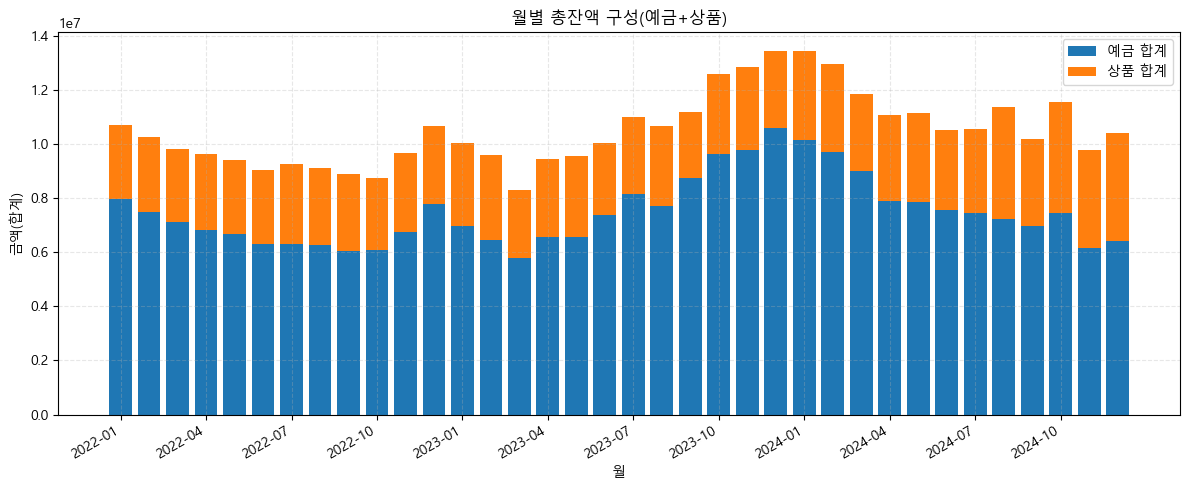

In [43]:
# 2-1) 전체 타임라인 스택(예금 vs 상품)
def plot_ym_stack(ym_df: pd.DataFrame, title='월별 총잔액 구성(예금+상품)'):
    dfp = ym_df.sort_values('월_시작일')
    x = np.arange(len(dfp))
    fig, ax = plt.subplots(figsize=(12,5))
    ax.bar(x, dfp['총예금잔액_sum'], label='예금 합계')
    ax.bar(x, dfp['총상품잔액_sum'], bottom=dfp['총예금잔액_sum'], label='상품 합계')
    ax.set_xticks(x[::max(1,len(x)//12)])  # 눈금 간격 자동
    ax.set_xticklabels(dfp['월'].iloc[::max(1,len(x)//12)], rotation=30, ha='right')
    ax.set_title(title); ax.set_xlabel('월'); ax.set_ylabel('금액(합계)')
    ax.legend(); ax.grid(True, linestyle='--', alpha=.3)
    plt.tight_layout(); plt.show()


plot_ym_stack(ym)   

### 연×월 총잔액 히트맵

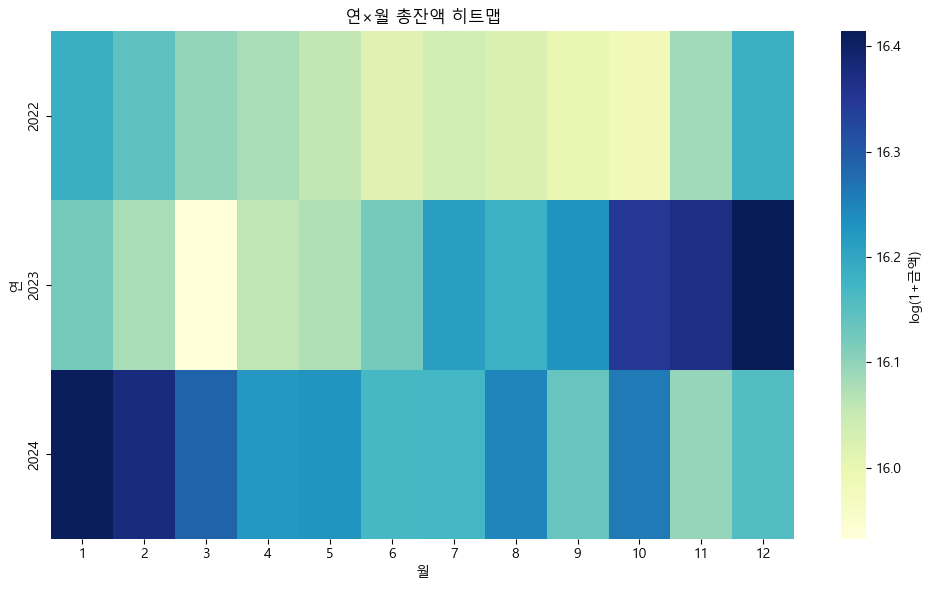

In [44]:
# 2-2) 연×월 히트맵(총잔액) — 시즌성 한눈에
def plot_year_month_heatmap(ym_df: pd.DataFrame, value='총잔액_sum'):
    piv = ym_df.pivot_table(index='연', columns='월번호', values=value, aggfunc='sum')
    # 1~12 컬럼 정렬 보장
    piv = piv.reindex(columns=list(range(1,13)))
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(np.log1p(piv), cmap='YlGnBu', annot=False,
                     cbar_kws={'label':'log(1+금액)'})
    ax.set_title('연×월 총잔액 히트맵'); ax.set_xlabel('월'); ax.set_ylabel('연')
    plt.tight_layout(); plt.show()
plot_year_month_heatmap(ym)

### 믹스(예금비중/상품비중) 라인

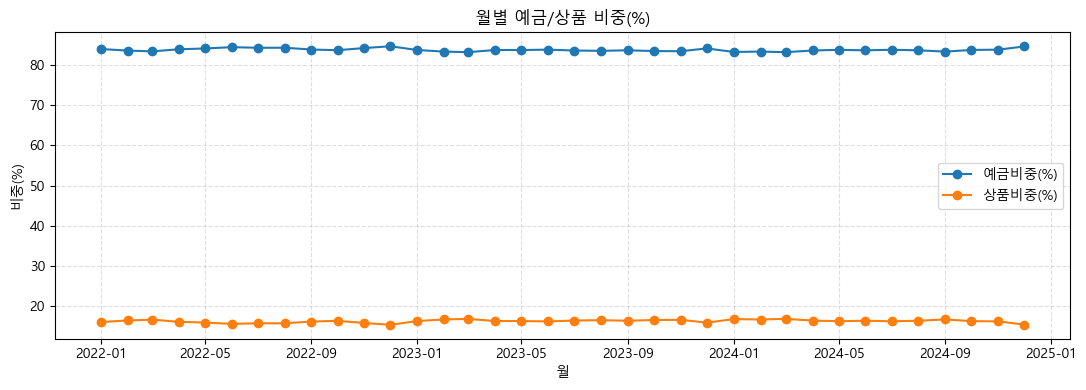

In [45]:
# 2-3) 믹스(예금비중/상품비중) 라인
def plot_mix_lines(ym_df: pd.DataFrame):
    dfp = ym_df.sort_values('월_시작일')
    plt.figure(figsize=(11,4))
    plt.plot(dfp['월_시작일'], dfp['예금비중']*100, marker='o', label='예금비중(%)')
    plt.plot(dfp['월_시작일'], dfp['상품비중']*100, marker='o', label='상품비중(%)')
    plt.title('월별 예금/상품 비중(%)'); plt.xlabel('월'); plt.ylabel('비중(%)')
    plt.grid(True, linestyle='--', alpha=.4); plt.legend()
    plt.tight_layout(); plt.show()
plot_mix_lines(ym)   

### 활동성: 회전율 라인 + MoM/YoY 보조

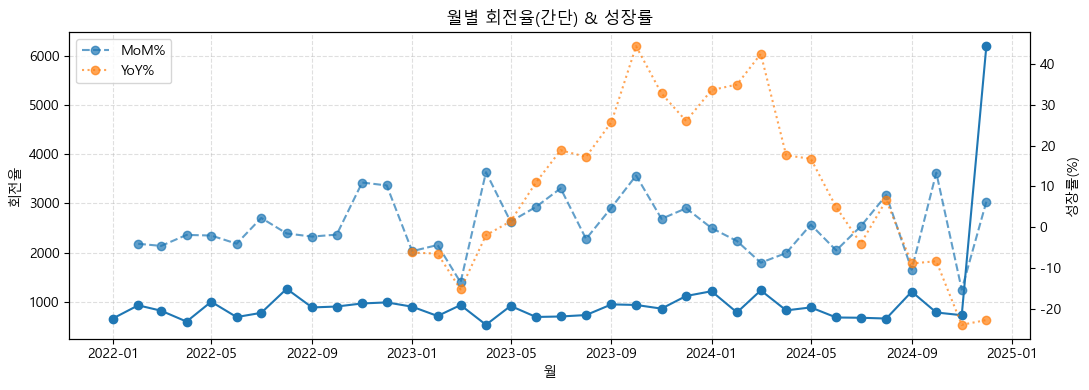

In [46]:
# 2-4) 활동성: 회전율 라인 + MoM/YoY 보조
def plot_turnover_and_growth(ym_df: pd.DataFrame):
    dfp = ym_df.sort_values('월_시작일')
    fig, ax = plt.subplots(figsize=(11,4))
    ax.plot(dfp['월_시작일'], dfp['회전율(간단)'], marker='o', label='회전율(간단)')
    ax.set_title('월별 회전율(간단) & 성장률'); ax.set_xlabel('월'); ax.set_ylabel('회전율')
    ax.grid(True, linestyle='--', alpha=.4)
    ax2 = ax.twinx()
    ax2.plot(dfp['월_시작일'], dfp['MoM_%'], marker='o', linestyle='--', alpha=.7, label='MoM%')
    ax2.plot(dfp['월_시작일'], dfp['YoY_%'], marker='o', linestyle=':',  alpha=.7, label='YoY%')
    ax2.set_ylabel('성장률(%)')
    ax2.legend(loc='upper left')
    plt.tight_layout(); plt.show()
plot_turnover_and_growth(ym)

### 월별 평균 회전율(간단)

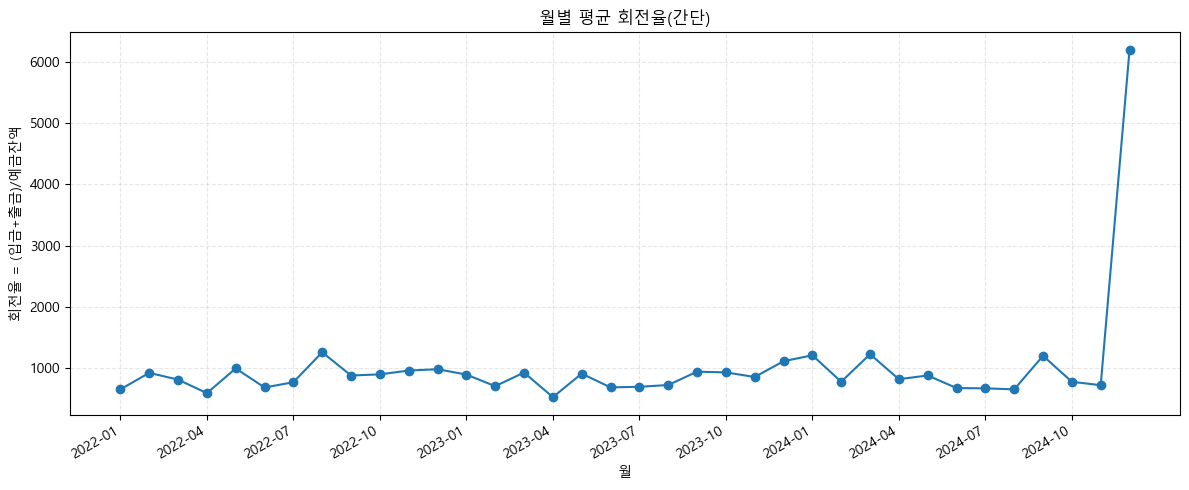

In [47]:
def plot_ym_turnover(ym_df: pd.DataFrame, title='월별 평균 회전율(간단)'):
    dfp = ym_df.sort_values('월_시작일')
    x = np.arange(len(dfp))
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(x, dfp['회전율(간단)'], marker='o')
    ax.set_xticks(x[::max(1,len(x)//12)])  # 눈금 간격 자동
    ax.set_xticklabels(dfp['월'].iloc[::max(1,len(x)//12)], rotation=30, ha='right')
    ax.set_title(title); ax.set_xlabel('월'); ax.set_ylabel('회전율 = (입금+출금)/예금잔액')
    ax.grid(True, linestyle='--', alpha=.3)
    plt.tight_layout(); plt.show()
plot_ym_turnover(ym)

#  월간/연간 성장률(MoM/YoY) & 업종 기여도

In [48]:
def ensure_totals(df):
    x = df.copy()
    if '총예금잔액' not in x: x['총예금잔액'] = x[['요구불예금잔액','거치식예금잔액','적립식예금잔액']].sum(axis=1, min_count=1)
    if '총상품잔액' not in x: x['총상품잔액'] = x[['수익증권잔액','신탁잔액','퇴직연금잔액']].sum(axis=1, min_count=1)
    if '총잔액' not in x:     x['총잔액'] = x['총예금잔액'] + x['총상품잔액']
    if '기준년월' in x and not pd.api.types.is_period_dtype(x['기준년월']):
        x['기준년월'] = pd.to_datetime(x['기준년월']).dt.to_period('M')
    return x

x = ensure_totals(df)

# 전체 월별 총잔액 합계 및 MoM/YoY
mon = (x.groupby('기준년월')['총잔액'].sum().to_frame('총잔액_sum').sort_index())
mon['MoM_%'] = mon['총잔액_sum'].pct_change()*100  # 전월 대비 증감률
mon['YoY_%'] = mon['총잔액_sum'].pct_change(12)*100  # 전년 동월 대비 증감률
print(mon.tail(15))



             총잔액_sum      MoM_%      YoY_%
기준년월                                      
2023-10  12593353.49  12.660672  44.338251
2023-11  12851141.56   2.047017  32.762927
2023-12  13446874.65   4.635643  26.026116
2024-01  13416783.54  -0.223778  33.597456
2024-02  12960843.31  -3.398283  34.958437
2024-03  11831771.92  -8.711404  42.464824
2024-04  11082837.54  -6.329858  17.604755
2024-05  11152422.85   0.627865  16.762437
2024-06  10517365.05  -5.694348   4.892575
2024-07  10541597.30   0.230402  -4.003595
2024-08  11368896.17   7.847946   6.600647
2024-09  10183172.51 -10.429541  -8.900909
2024-10  11542919.22  13.352879  -8.341180
2024-11   9776374.99 -15.304138 -23.926019
2024-12  10386229.03   6.238039 -22.761018


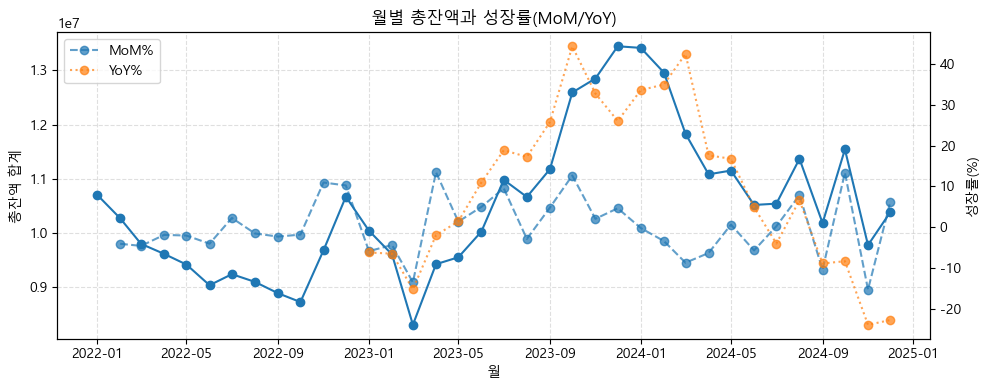

In [49]:
def plot_total_mom_yoy(df: pd.DataFrame):
    x = ensure_totals(df)
    mon = (x.groupby('기준년월')['총잔액'].sum()
             .to_frame('총잔액_sum').sort_index())
    mon['MoM_%'] = mon['총잔액_sum'].pct_change()*100
    mon['YoY_%'] = mon['총잔액_sum'].pct_change(12)*100

    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(mon.index.to_timestamp(), mon['총잔액_sum'], marker='o')
    ax.set_title('월별 총잔액과 성장률(MoM/YoY)')
    ax.set_xlabel('월'); ax.set_ylabel('총잔액 합계')
    ax2 = ax.twinx()
    ax2.plot(mon.index.to_timestamp(), mon['MoM_%'], marker='o', linestyle='--', alpha=.7, label='MoM%')
    ax2.plot(mon.index.to_timestamp(), mon['YoY_%'], marker='o', linestyle=':',  alpha=.7, label='YoY%')
    ax2.set_ylabel('성장률(%)')
    ax2.legend(loc='upper left')
    ax.grid(True, linestyle='--', alpha=.4)
    plt.tight_layout(); plt.show()
plot_total_mom_yoy(x)

In [50]:
# 특정 월의 증감에 대한 업종 기여도(= 업종 증감 / 전체 증감)
if '업종_대분류' in x.columns:
    mon_ind = (x.groupby(['기준년월','업종_대분류'])['총잔액'].sum().rename('sum').reset_index())
    mon_ind = mon_ind.sort_values(['기준년월','sum'])
    tgt = mon_ind['기준년월'].max()                  # 마지막 월
    prev = (tgt - 1) if isinstance(tgt, pd.Period) else None
    base = mon_ind.query("기준년월 == @prev").set_index('업종_대분류')['sum']
    cur  = mon_ind.query("기준년월 == @tgt").set_index('업종_대분류')['sum']
    delta = (cur - base).dropna()
    total_delta = delta.sum()
    contrib = (delta / total_delta * 100).sort_values(ascending=False)
    print(f"\n업종별 기여도(최근 {tgt} 대비 전월):\n", contrib.head(10).round(1))


업종별 기여도(최근 2024-12 대비 전월):
 업종_대분류
건설업                         111.1
제조업                          36.8
정보통신업                         2.7
보건업 및 사회복지 서비스업               1.4
숙박 및 음식점업                     1.1
사업시설 관리, 사업 지원 및 임대 서비스업      1.0
도매 및 소매업                      0.5
수도, 하수 및 폐기물 처리, 원료 재생업       0.1
부동산업                          0.1
농업, 임업 및 어업                   0.0
Name: sum, dtype: float64


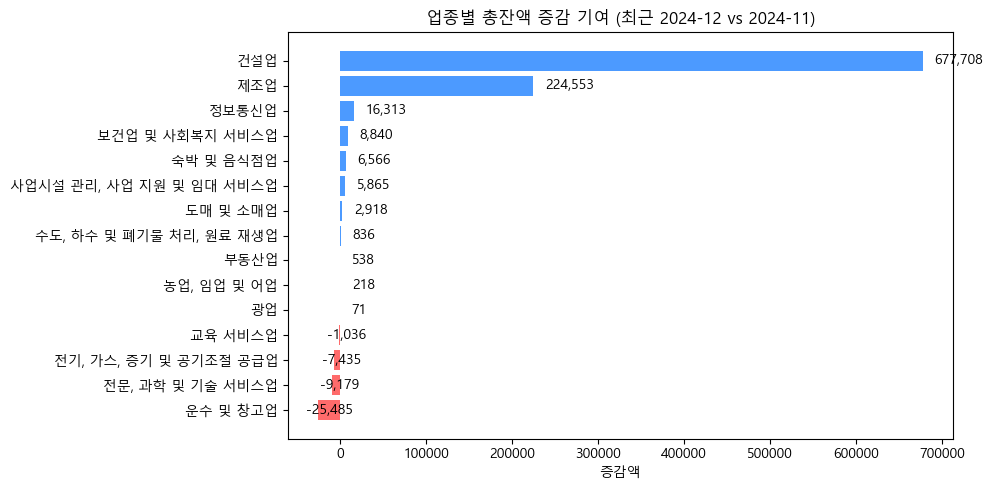

In [51]:
def plot_latest_industry_contrib(df: pd.DataFrame, level_col='업종_대분류', topn=15):
    x = ensure_totals(df)
    g = (x.groupby(['기준년월', level_col])['총잔액']
           .sum().rename('sum').reset_index().sort_values(['기준년월', level_col]))
    last = g['기준년월'].max()
    prev = last - 1
    base = g.query("기준년월 == @prev").set_index(level_col)['sum']
    cur  = g.query("기준년월 == @last").set_index(level_col)['sum']
    delta = (cur - base).dropna().sort_values(ascending=False)
    delta_top = delta.head(topn)
    fig, ax = plt.subplots(figsize=(10,5))
    colors = np.where(delta_top.values>=0, '#4C9AFF', '#FF6B6B')
    ax.barh(delta_top.index, delta_top.values, color=colors)
    ax.set_title(f'업종별 총잔액 증감 기여 (최근 {str(last)} vs {str(prev)})')
    ax.set_xlabel('증감액'); ax.invert_yaxis()
    for y,v in enumerate(delta_top.values):
        ax.text(v + (0.02*np.sign(v)+1e-9)*delta_top.abs().max(), y, f'{v:,.0f}', va='center')
    plt.tight_layout(); plt.show()
plot_latest_industry_contrib(x, level_col='업종_대분류', topn=15)

🧐 해석 가이드(어떻게 읽나요?)

막대 값(Δ)

양수(파란색): 해당 업종이 총잔액 증가에 기여.

음수(빨간색): 해당 업종이 총잔액 감소를 유발(증가를 깎아먹음).

정렬 기준

큰 값부터 표시하므로 최근 월의 증가를 가장 많이 만든 업종이 위에 옴.

만약 증가 업종이 적으면, 일부 **감소 업종(음수)**도 상위 목록에 포함될 수 있음(값이 덜 음수인 순서).

기여도 출력(contrib)

값이 클수록 최근 월의 전체 증감 속에서 차지하는 비중이 큼.

전체가 **순감소(Δ_total < 0)**인 달이면, 양수 업종의 기여도는 음수가 될 수 있어(수학적으로는 맞지만, 인사이트 용으론 헷갈릴 수 있음—아래 개선 팁 참조).

인사이트 루틴

Top 3~5 업종이 증가분의 대부분을 설명하는지 확인(집중도).

상위 감소 업종(음수)이 있는지 따로 보고, 왜 감소했는지(계절, 정책, 특정 대형고객 이탈 등) 원인 태깅.

전월 대비라서 일시성 영향(월말/분기말/프로모션)에 민감 → 필요 시 YoY 업종 기여도 같이 보완

In [52]:
if '총예금잔액' not in x.columns or '총상품잔액' not in x.columns:
    x = ensure_totals(x)
x['예금비중'] = np.where(x['총잔액']>0, x['총예금잔액']/x['총잔액'], np.nan)

def tag_mix(p):
    if pd.isna(p): return '미산정'
    if p >= 0.7: return '예금형'
    if p <= 0.3: return '상품형'
    return '균형형'

x['믹스구간'] = x['예금비중'].map(tag_mix)
mix_tab = x.groupby(['업종_대분류','믹스구간']).size().unstack(fill_value=0)
mix_tab['합계'] = mix_tab.sum(axis=1)
mix_tab = (mix_tab.T / mix_tab['합계']).T * 100
print(mix_tab.round(1).sort_values('합계', ascending=False).head(10))


믹스구간                       균형형   미산정   상품형   예금형     합계
업종_대분류                                                 
건설업                        5.3   7.9   9.8  76.9  100.0
광업                         5.6  12.4   3.7  78.3  100.0
교육 서비스업                    4.9   7.6   5.1  82.4  100.0
금융 및 보험업                   3.9  30.9  10.8  54.4  100.0
농업, 임업 및 어업                0.0  13.1   0.0  86.9  100.0
도매 및 소매업                   5.3   9.9  10.4  74.4  100.0
보건업 및 사회복지 서비스업           10.8   7.8  25.4  56.0  100.0
부동산업                       1.8  11.8   3.4  83.0  100.0
사업시설 관리, 사업 지원 및 임대 서비스업   2.8   8.0   8.8  80.3  100.0
수도, 하수 및 폐기물 처리, 원료 재생업    7.6   4.9  10.1  77.4  100.0


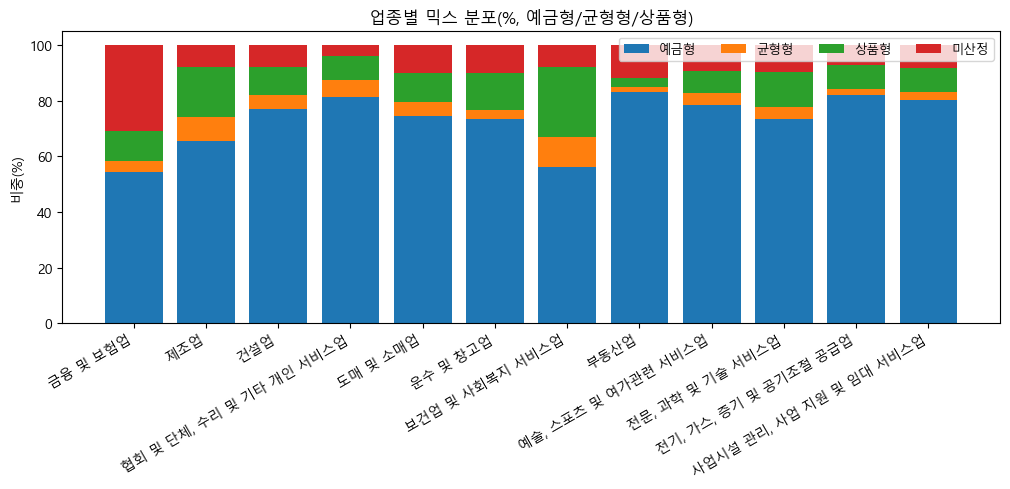

In [53]:
def plot_mix_distribution(df: pd.DataFrame, level_col='업종_대분류', topn=12):
    x = ensure_totals(df)
    x['예금비중'] = np.where(x['총잔액']>0, x['총예금잔액']/x['총잔액'], np.nan)
    def tag(p):
        if pd.isna(p): return '미산정'
        if p >= 0.7:   return '예금형'
        if p <= 0.3:   return '상품형'
        return '균형형'
    x['믹스구간'] = x['예금비중'].map(tag)
    inds = (x.groupby(level_col)['총잔액'].sum().sort_values(ascending=False).index[:topn])
    tab = (x[x[level_col].isin(inds)].groupby([level_col,'믹스구간'])
              .size().unstack(fill_value=0))
    tab = (tab.T / tab.sum(axis=1)).T * 100
    order_cols = ['예금형','균형형','상품형','미산정']
    order_cols = [c for c in order_cols if c in tab.columns]
    tab = tab[order_cols].reindex(inds)
    # 스택 바
    fig, ax = plt.subplots(figsize=(max(8, 0.6*len(inds)+3), 5))
    bottoms = np.zeros(len(tab))
    for c in order_cols:
        ax.bar(tab.index, tab[c].values, bottom=bottoms, label=c)
        bottoms += tab[c].values
    ax.set_title('업종별 믹스 분포(%, 예금형/균형형/상품형)')
    ax.set_ylabel('비중(%)'); ax.legend(ncol=4, fontsize=9)
    plt.xticks(rotation=30, ha='right'); plt.tight_layout(); plt.show()
plot_mix_distribution(x, level_col='업종_대분류', topn=12)

👀 어떻게 해석하나

가로축(업종): 잔액 규모가 큰 상위 업종들.

막대(스택, %): 그 업종에서 **기업(혹은 관측치)** 들이 어떤 믹스를 더 많이 갖고 있는지의 구성비.

예금형 비중↑: 유동성 선호·보수적 운용·단기 운전자금 니즈 가능성.

상품형 비중↑: 장기/수익형 운용 선호·투자 성향·퇴직연금/신탁 활용도↑.

균형형 비중↑: 포트폴리오가 골고루 분산.

미산정↑: 총잔액 0/결측 사례 많음 → 데이터 품질/관측 단위 확인 필요.

업종 간 비교 포인트

예금형이 두드러진 업종: 금리/유동성 변화에 민감, 예·적금 프로모션 반응 가능성↑.

상품형 높은 업종: 수익증권/신탁/퇴직연금 제안 여지↑(교차판매 타겟).

균형형 중심 업종: 상황별 제안(단기+중장기) 패키징 적합.

미산정 높은 업종: 데이터 전처리/잔액 스냅샷 시점/휴면계정 여부 점검.